In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import prince

%matplotlib inline

In [2]:
dados_tunning = pd.read_json('dados/dados_workflow_ivan.json')
dados = dados_tunning.copy()
dados.shape

(8908, 33)

In [3]:
dados['id'].nunique()

8908

In [4]:
#calculo de analise de correspondencia de acordo com o livro "Análise multivariada de dados. 
#Joseph F Hair Jr [et al.] – 6. ed. Bookman, 2009"
def calc_AC(tbl):
    df = tbl
    
    s1 = np.array(df.sum(axis=0))
    s2 = np.array(df.sum(axis=1))

    #somas
    #print(s1)
    #print(s2)
    
    #quantidade esperada nao normalizada
    mult_s = np.outer(s1[:, None], s2).T
    #print(mult_s)
    
    total_geral = df.sum().sum()
    #print(total_geral)    
    
    #quantidade esperada normalizada
    cont_esperada = mult_s/total_geral
    #print(cont_esperada)    
    
    #diferenca entre esperada e real
    diferenca = cont_esperada - df
    #print(diferenca)    
    
    #calculo qui-quadrado
    q2 = (diferenca*diferenca)/cont_esperada
    #print(q2)
    
    sinal = np.sign(diferenca) * -1
    #print(sinal)
    
    q2_sinal = q2 * sinal
    #print(q2_sinal)
    
    return q2_sinal

LnguaPortuguesaeLiteraturaI90H
------------------------------


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


LnguaPortuguesaeLiteraturaI90H_dependencia
------------------------------------------
LnguaPortuguesaeLiteraturaI90H_freq
-----------------------------------
MatemticaI120H
--------------


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MatemticaI120H_dependencia
--------------------------
MatemticaI120H_freq
-------------------
acompanhamento
--------------
aluno_exclusivo_rede_publica
----------------------------
artificial
----------
conceito
--------
conceito_freq
-------------
descricao
---------
descricao_area_residencial
--------------------------
descricao_companhia_domiciliar
------------------------------
descricao_estado_civil
----------------------
descricao_historico
-------------------
descricao_imovel
----------------
descricao_mae_escolaridade
--------------------------
descricao_pai_escolaridade
--------------------------
descricao_raca
--------------
descricao_responsavel_escolaridade
----------------------------------
descricao_responsavel_financeiro
--------------------------------
descricao_trabalho
------------------
idade
-----
pessoa_fisica__sexo
-------------------
possui_necessidade_especial
---------------------------
qnt_pc
------
qnt_salarios
------------
qtd_pessoas_domicilio
------------

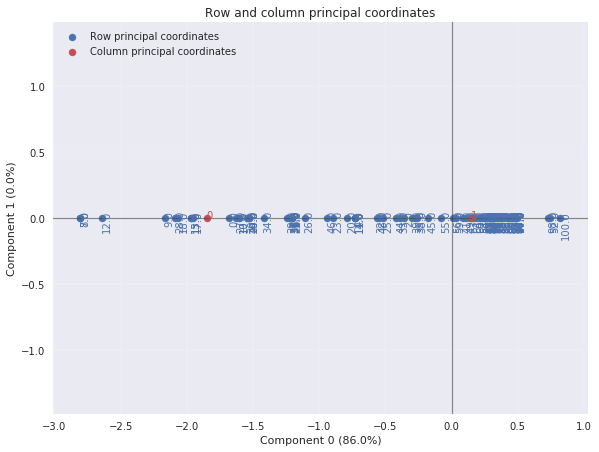

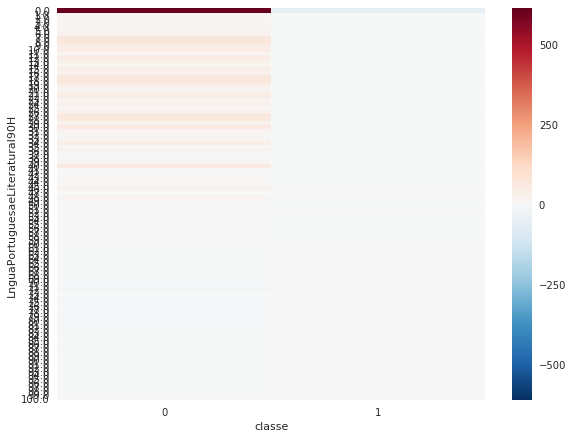

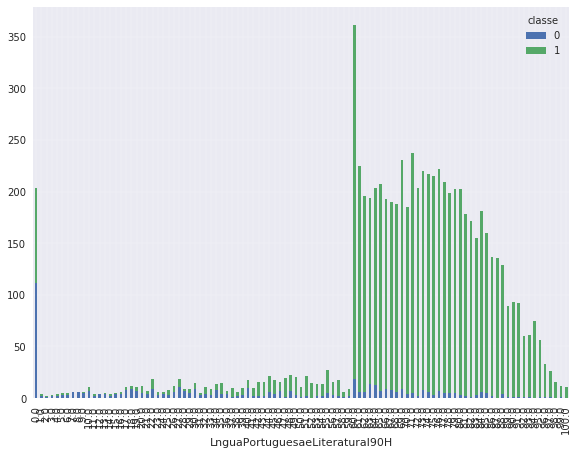

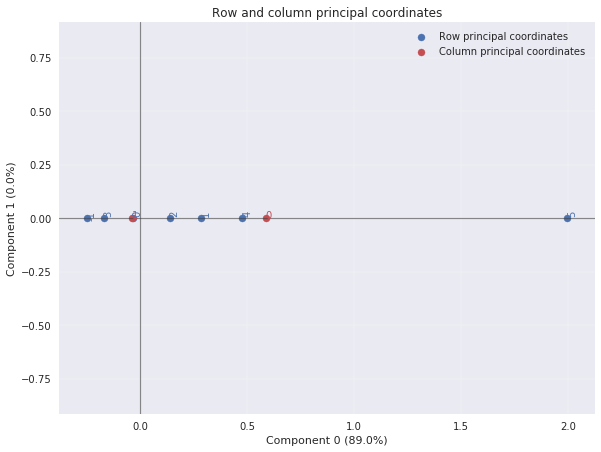

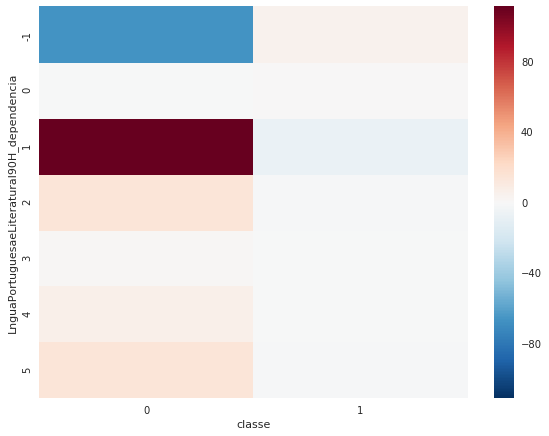

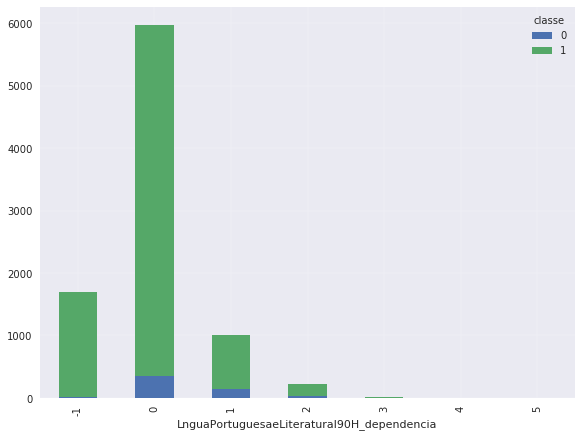

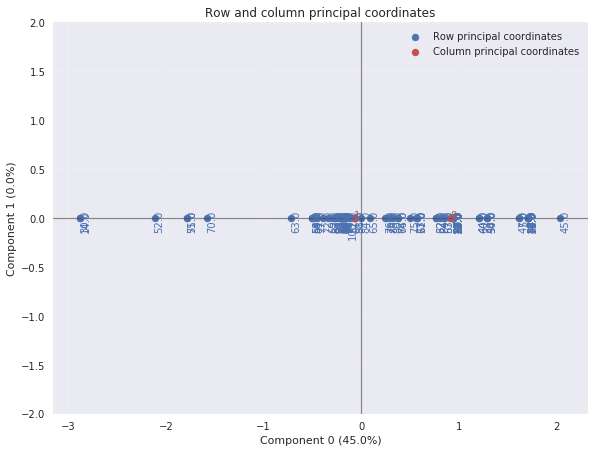

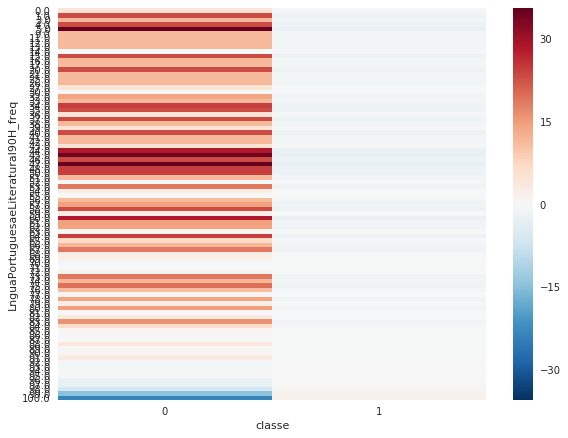

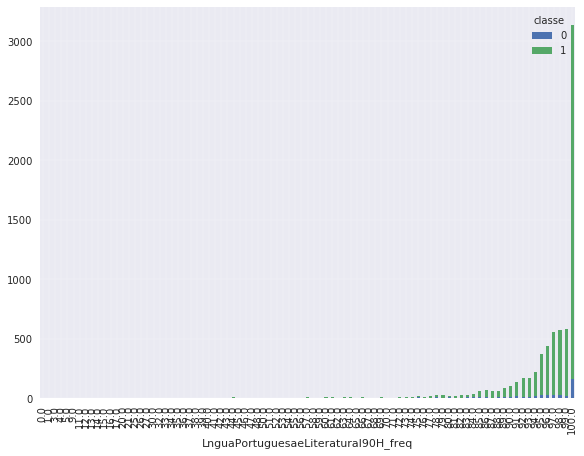

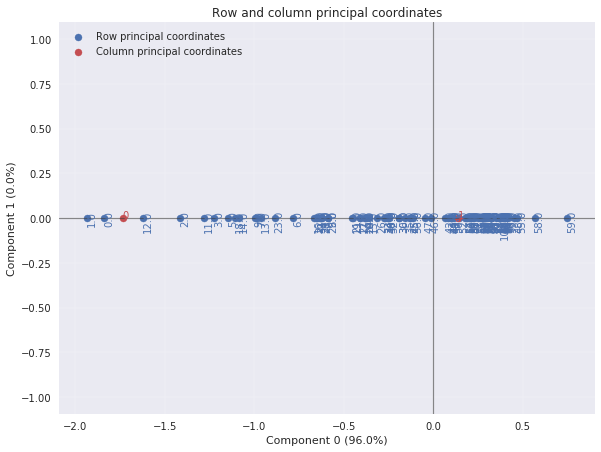

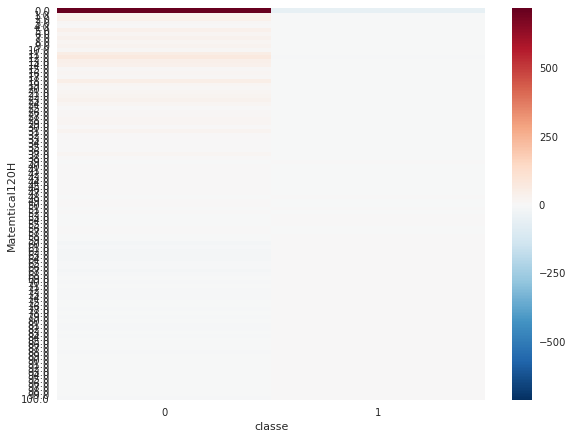

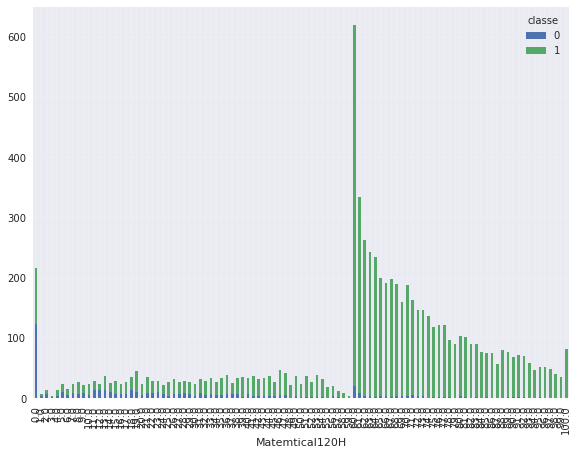

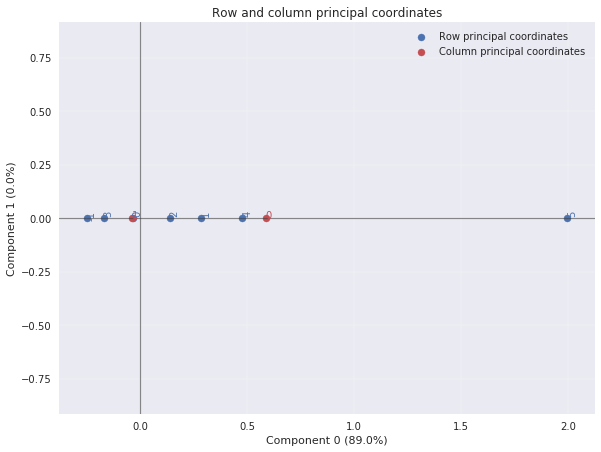

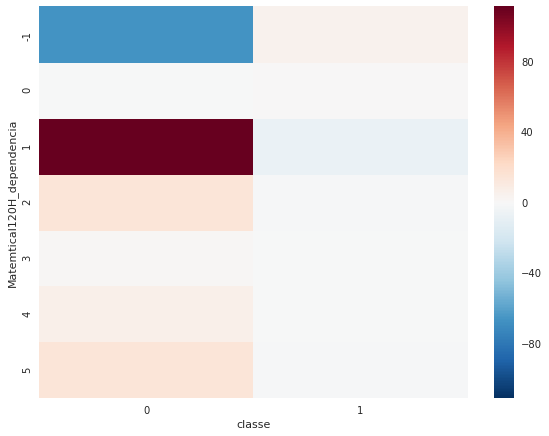

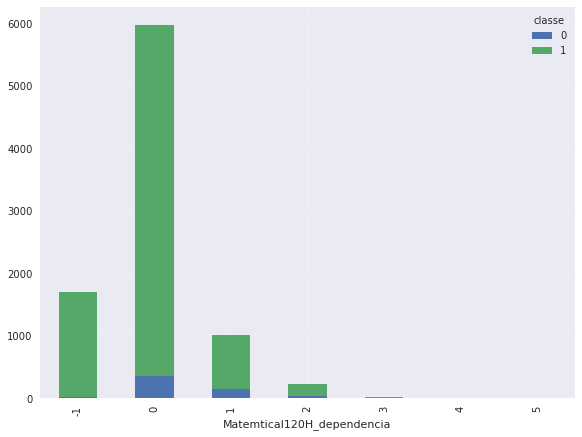

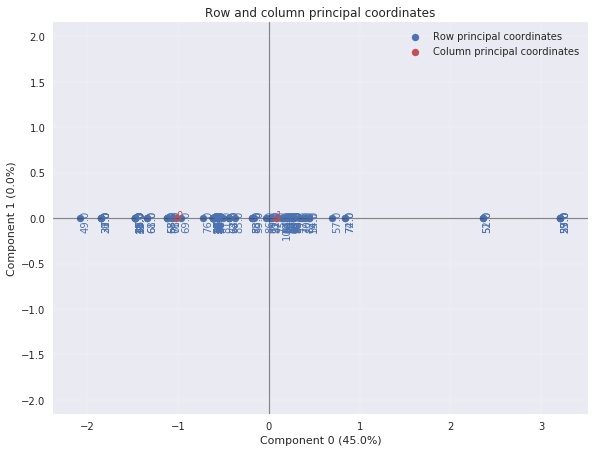

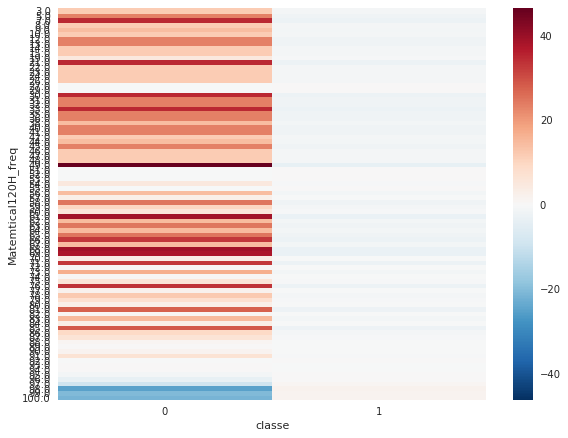

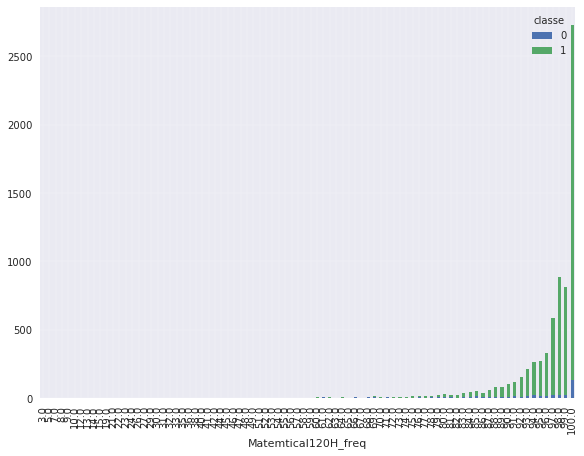

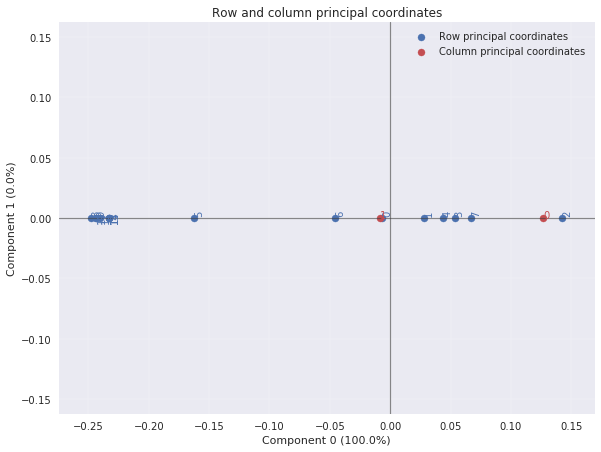

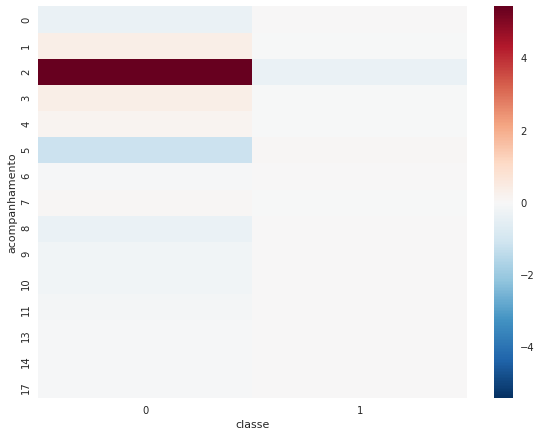

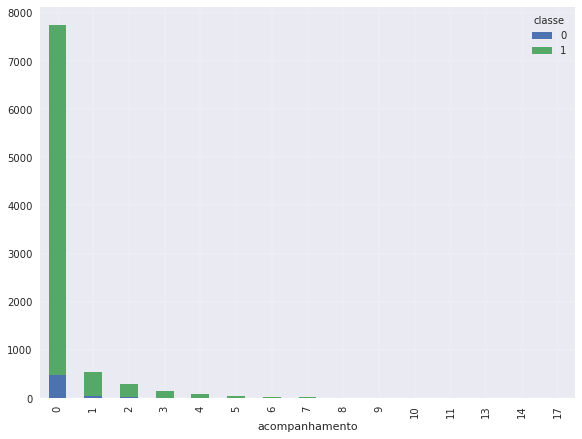

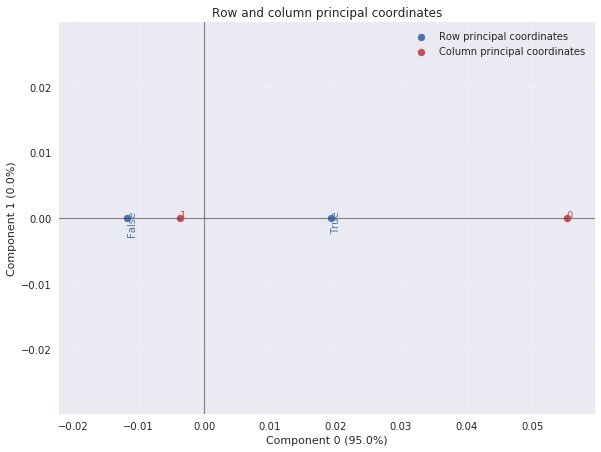

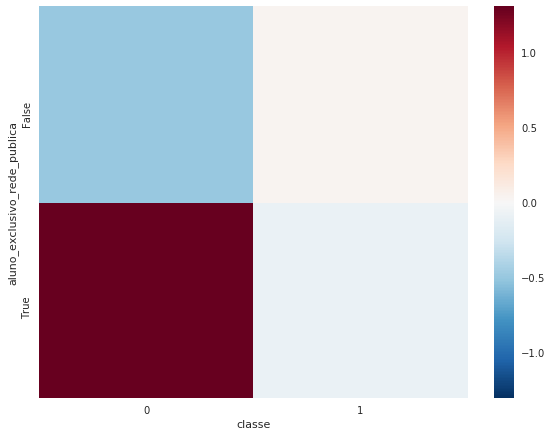

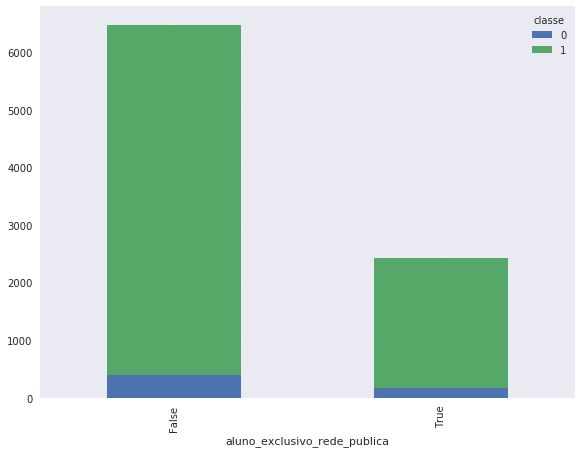

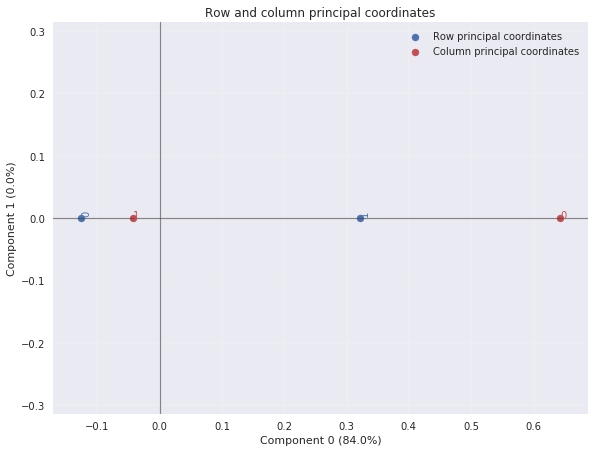

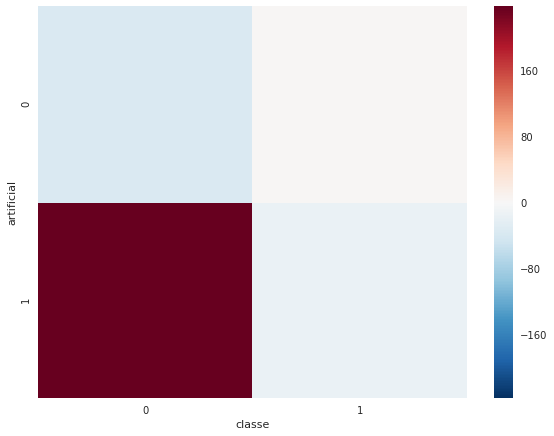

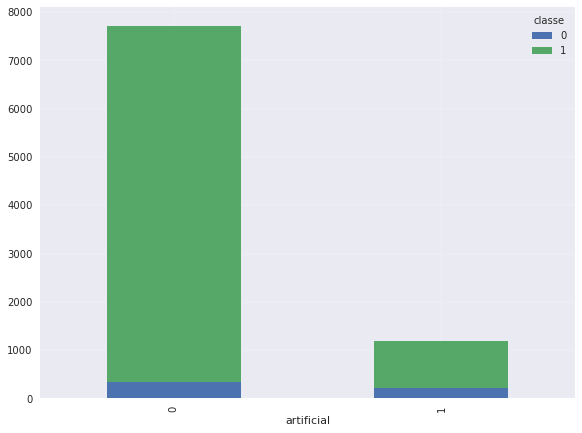

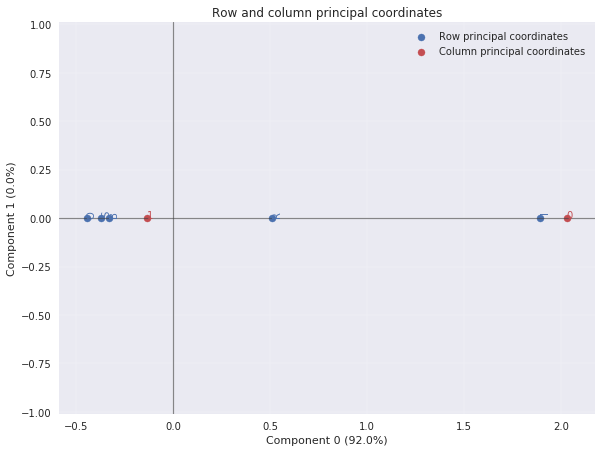

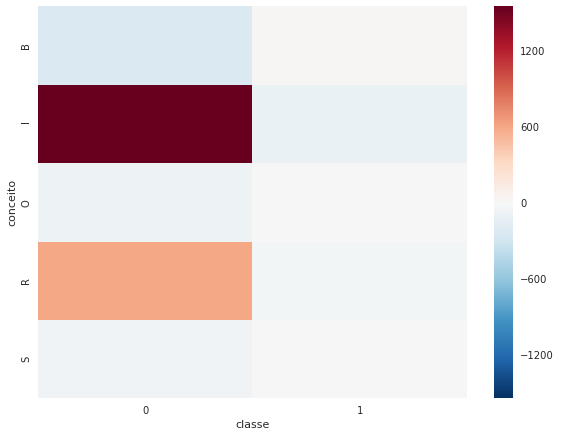

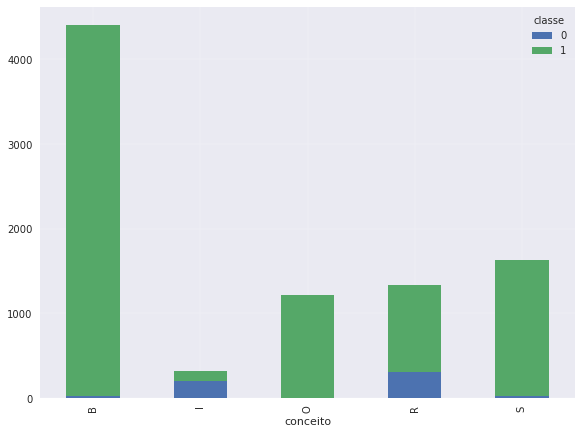

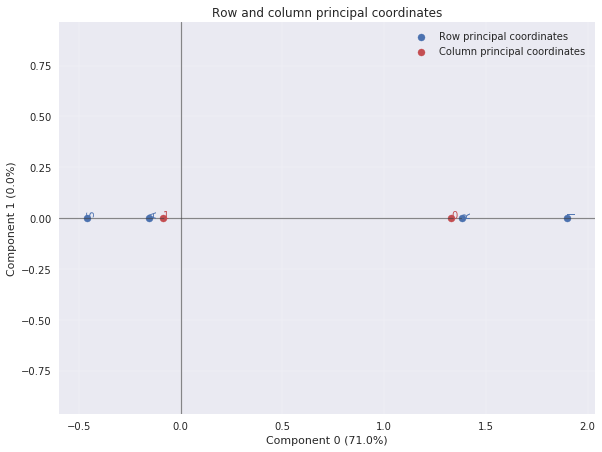

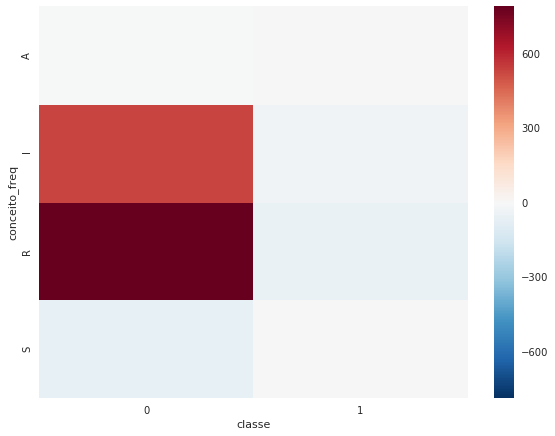

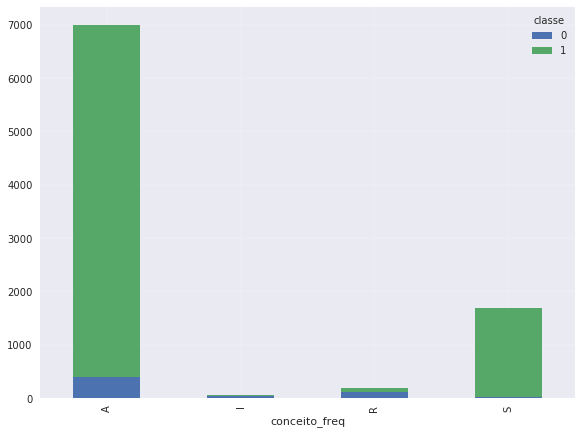

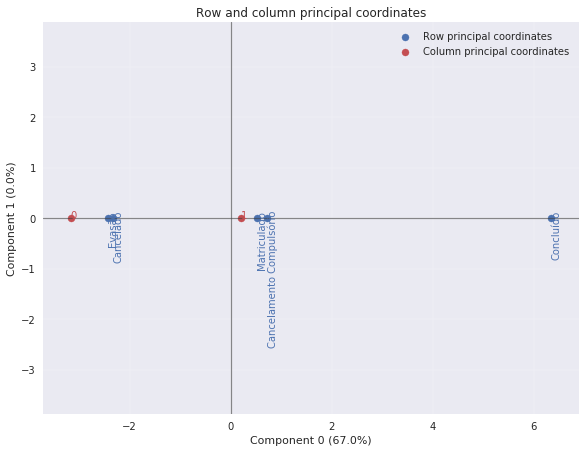

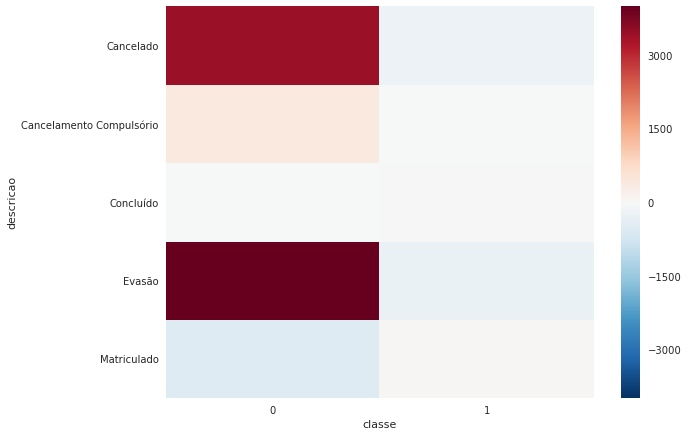

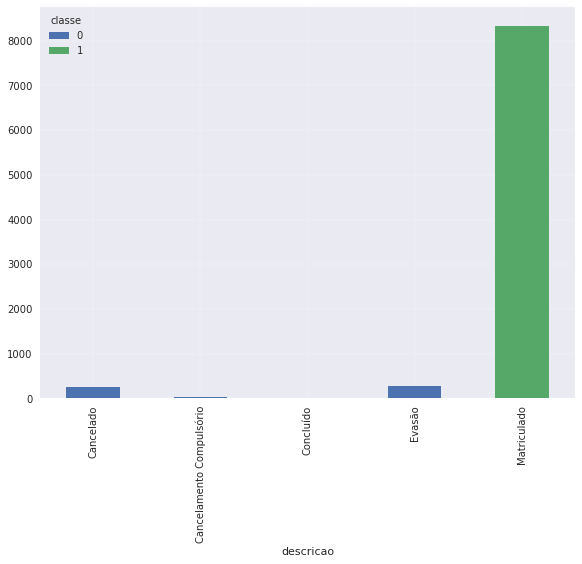

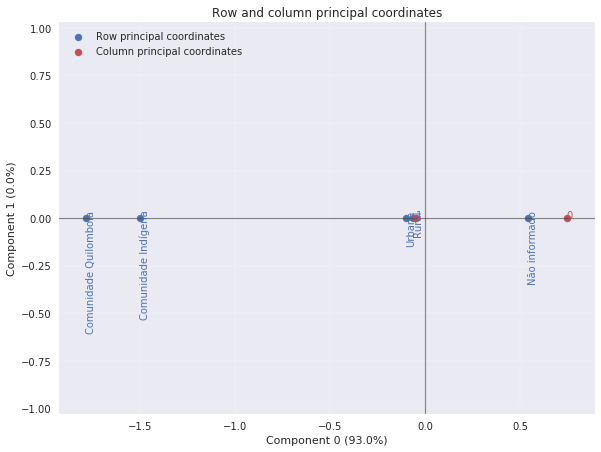

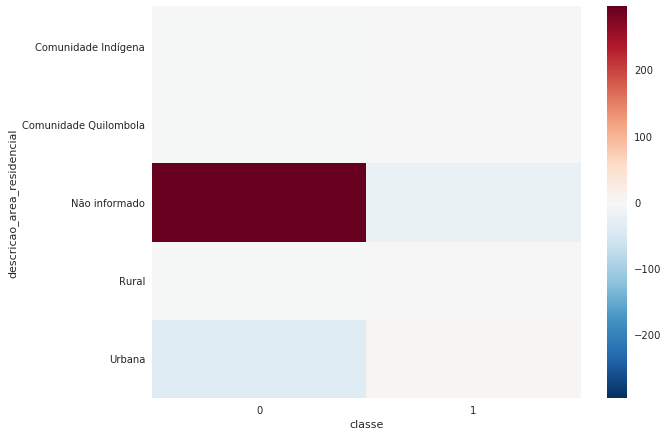

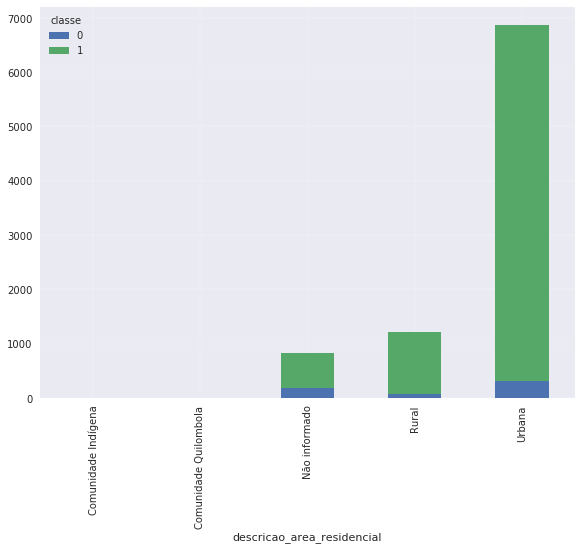

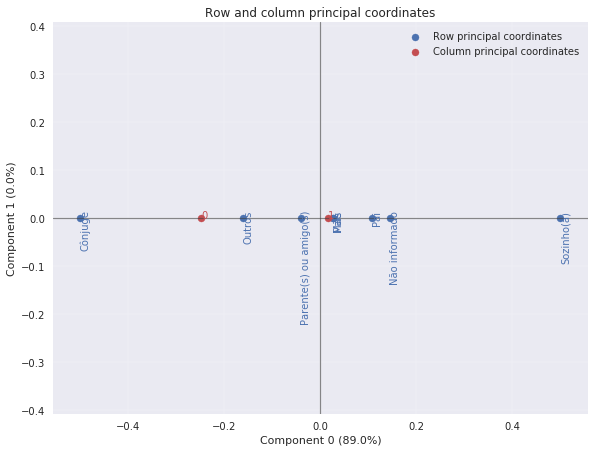

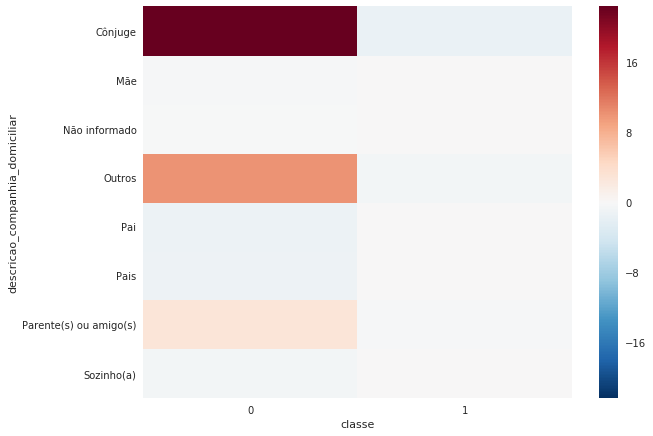

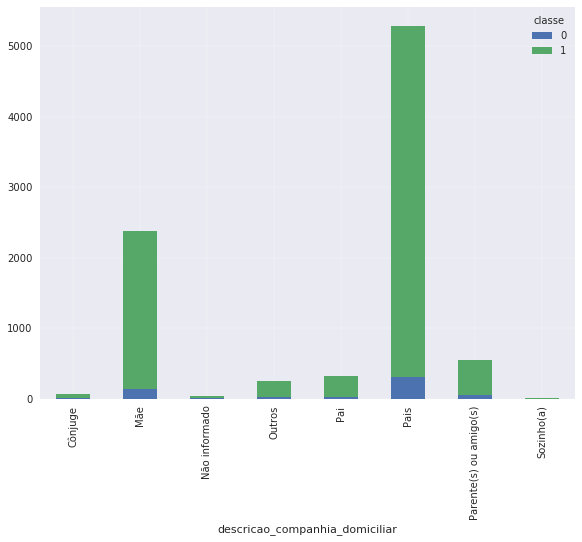

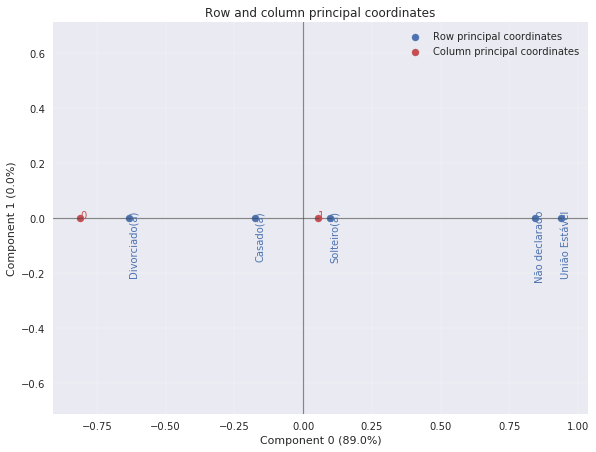

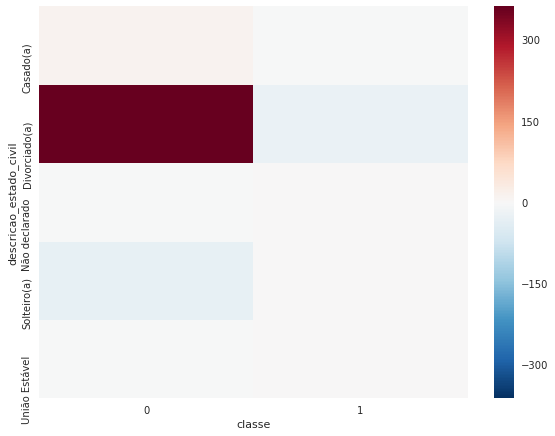

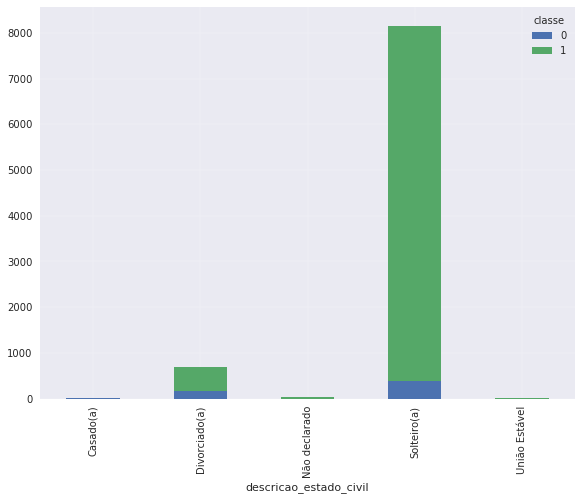

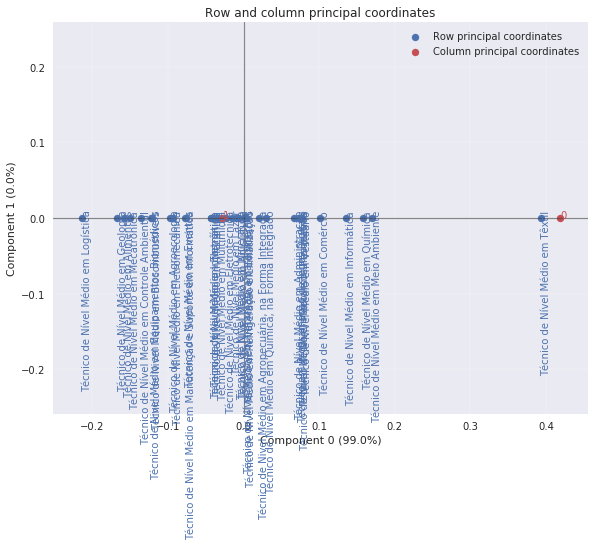

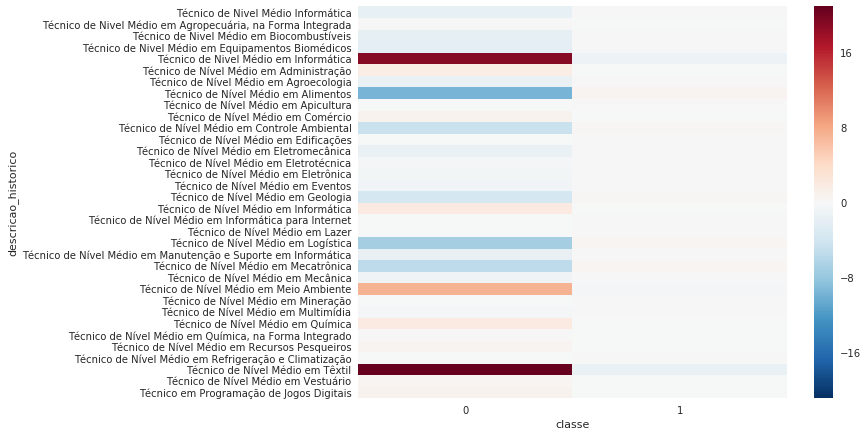

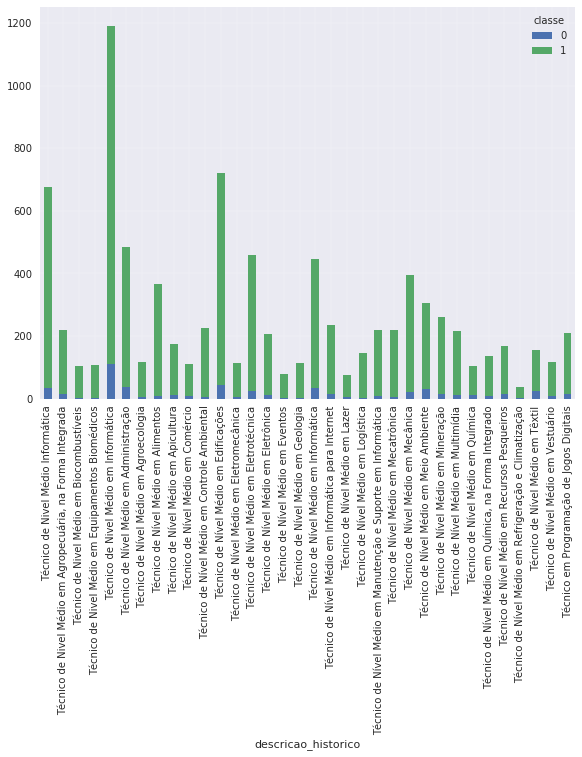

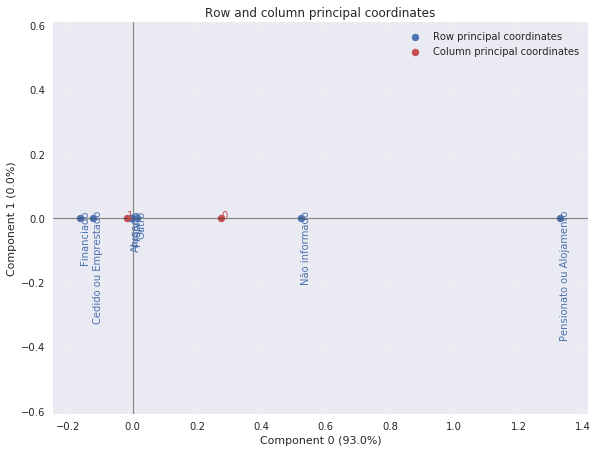

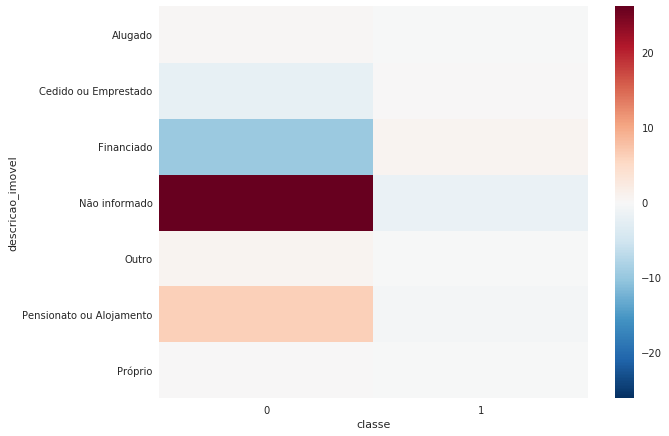

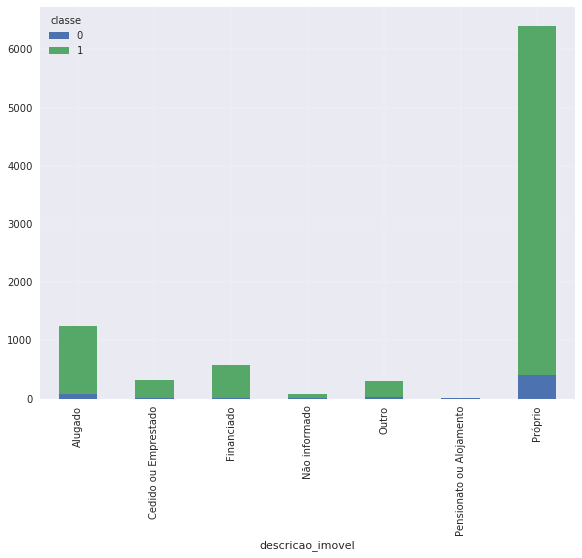

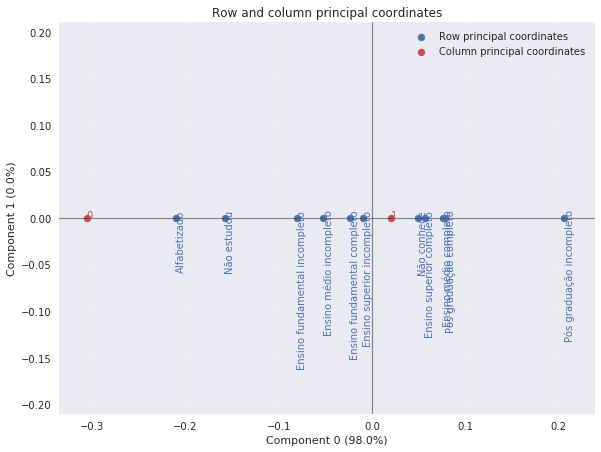

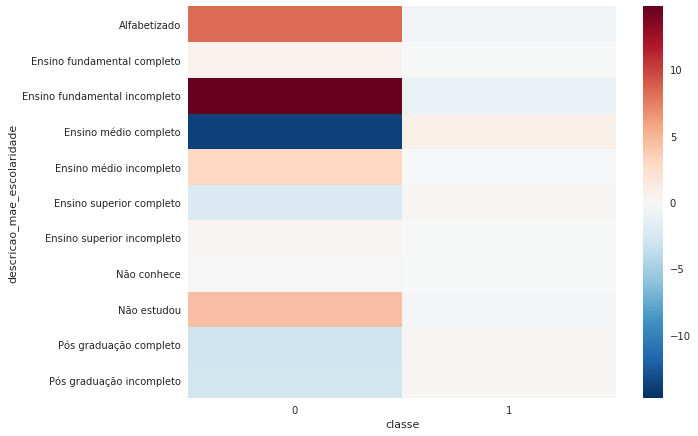

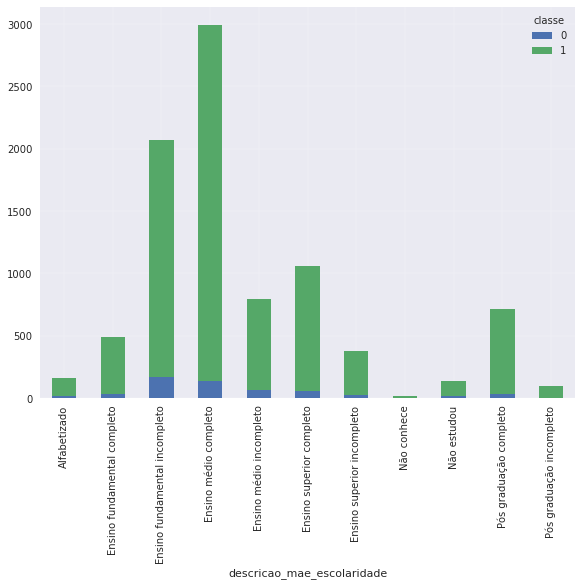

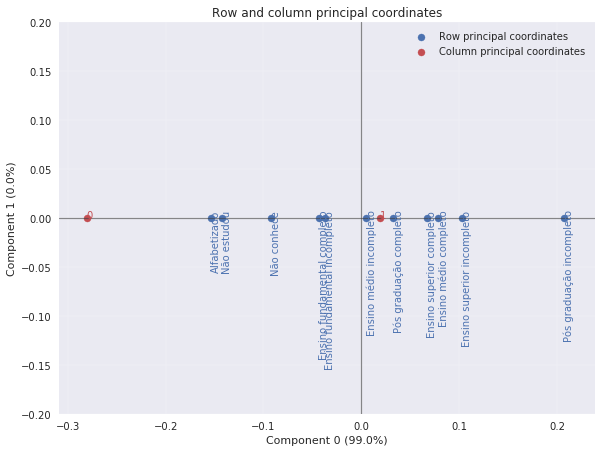

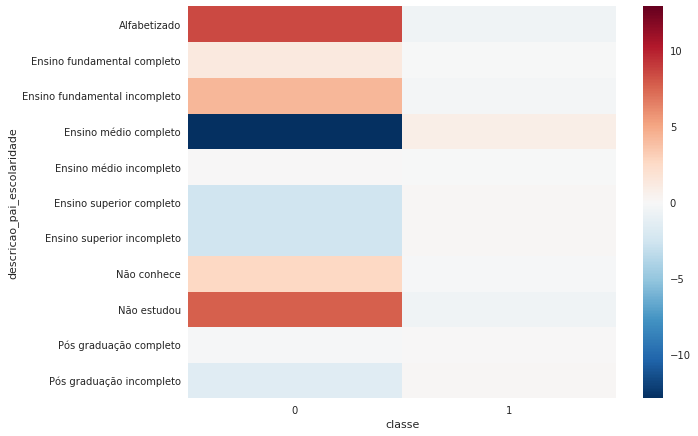

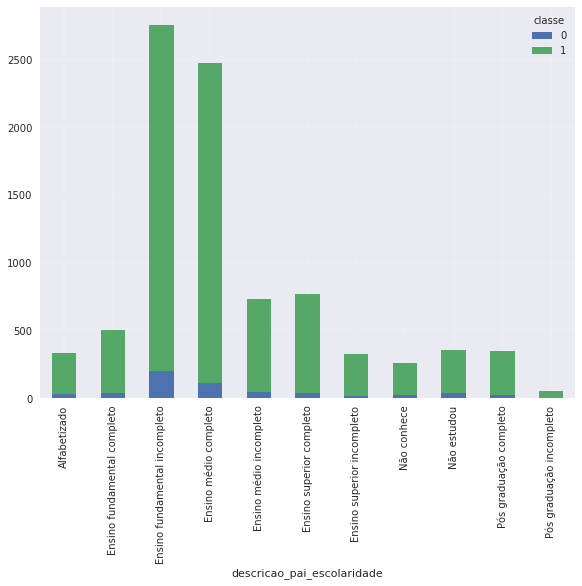

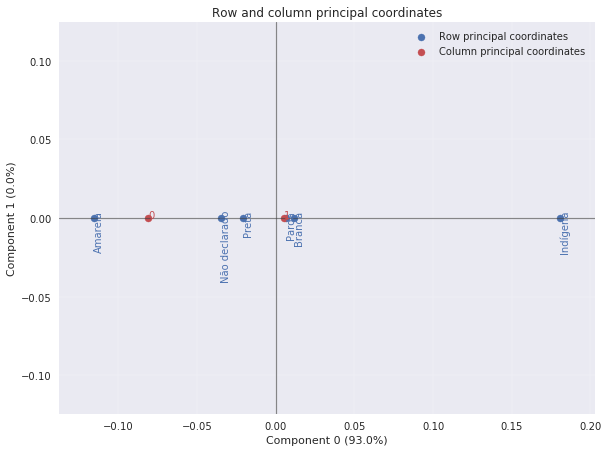

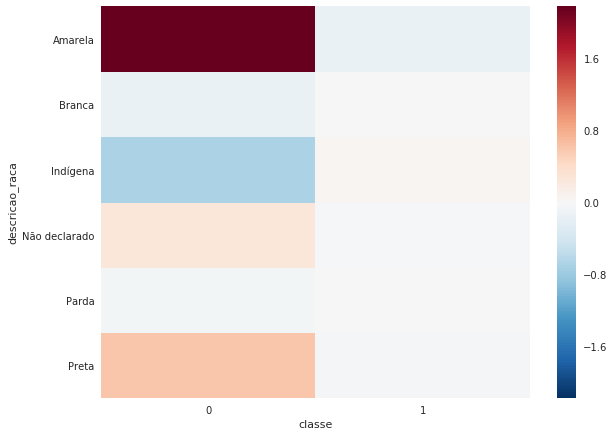

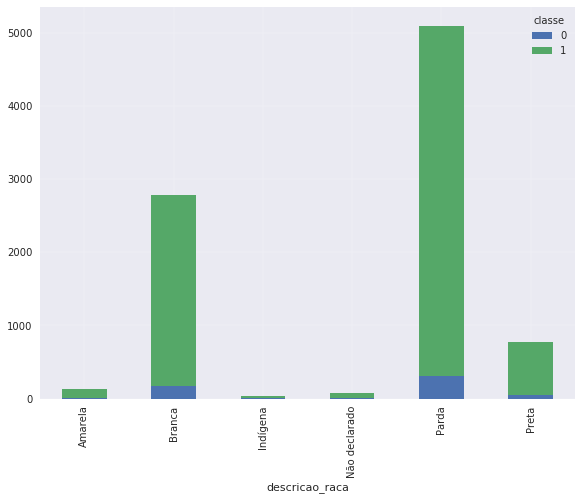

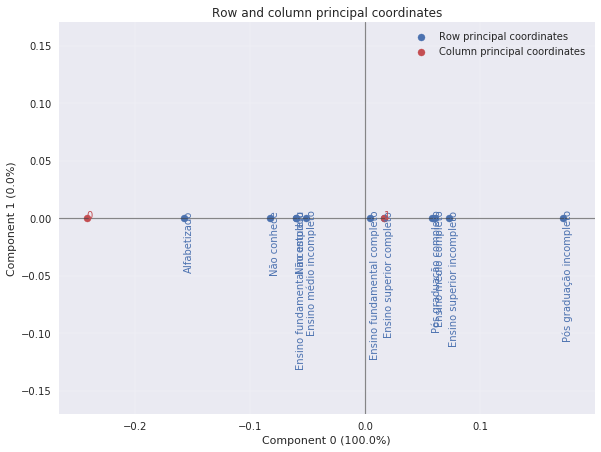

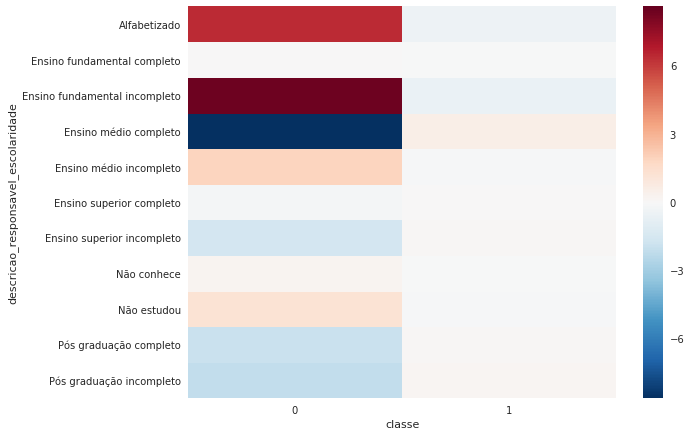

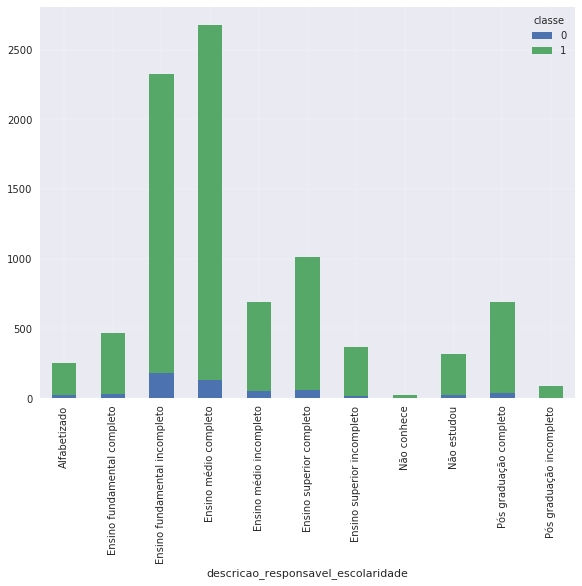

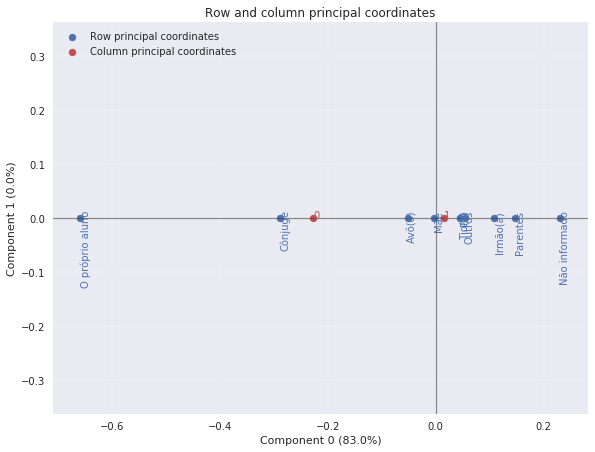

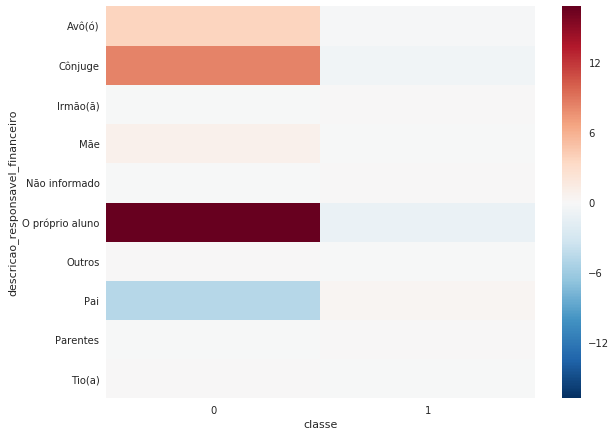

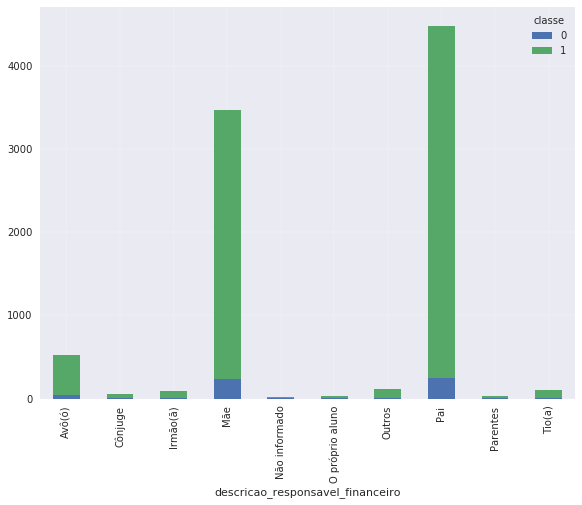

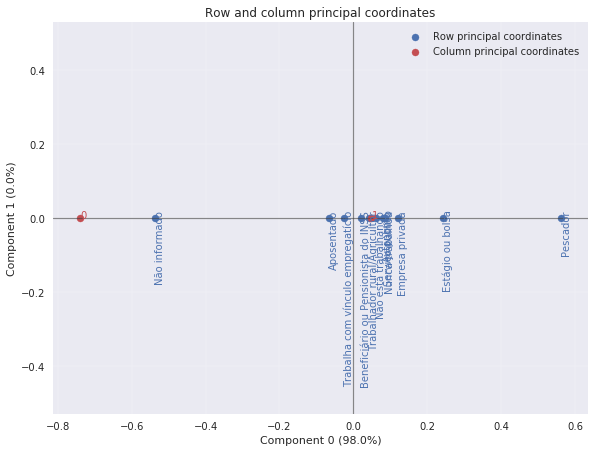

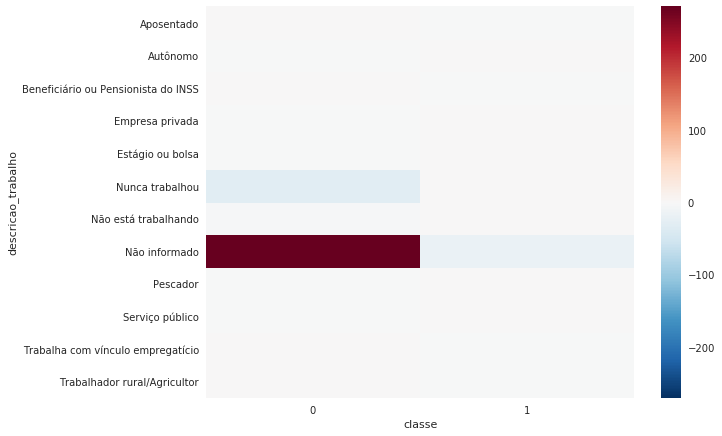

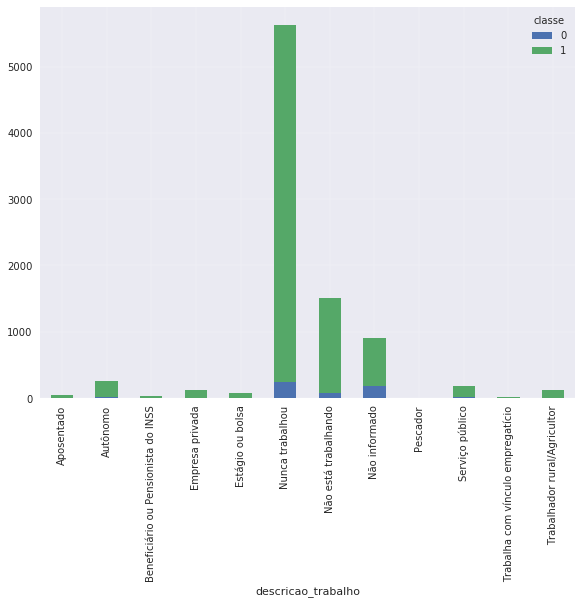

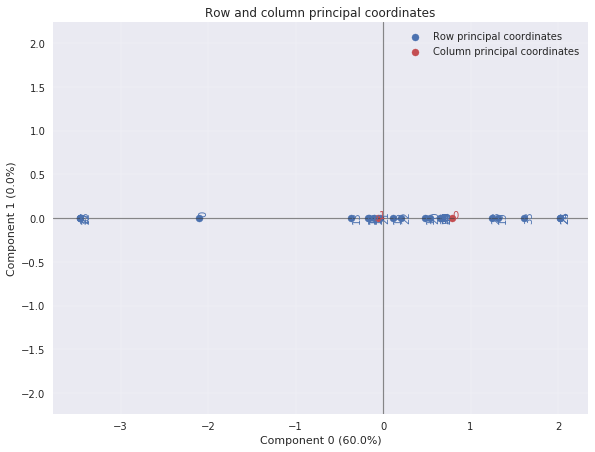

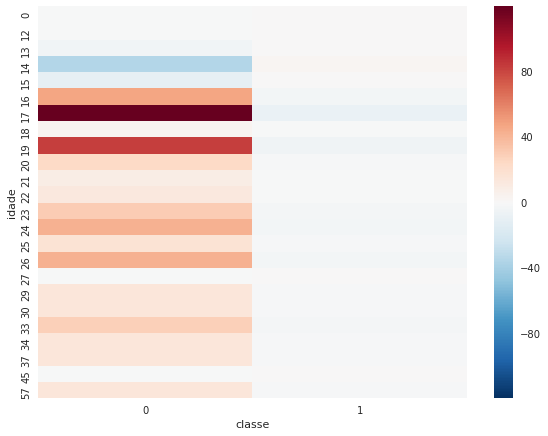

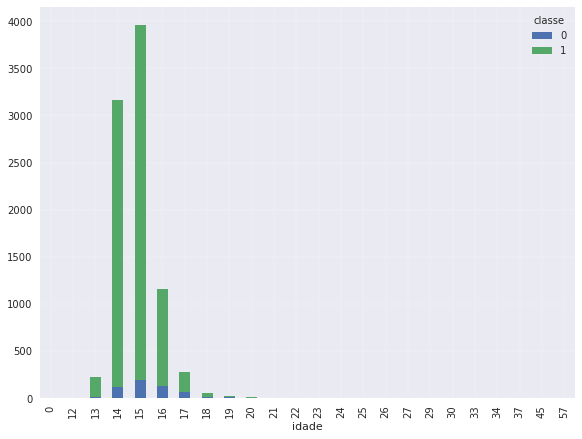

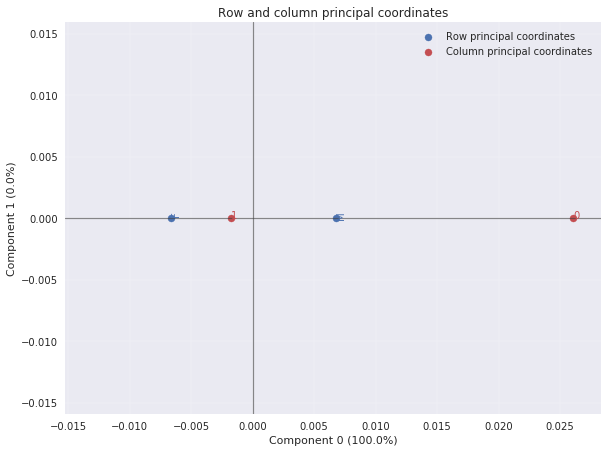

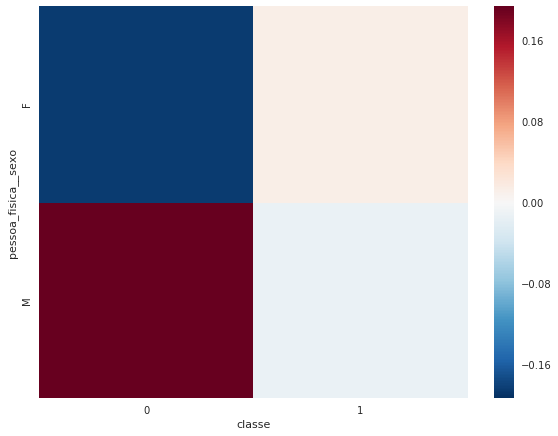

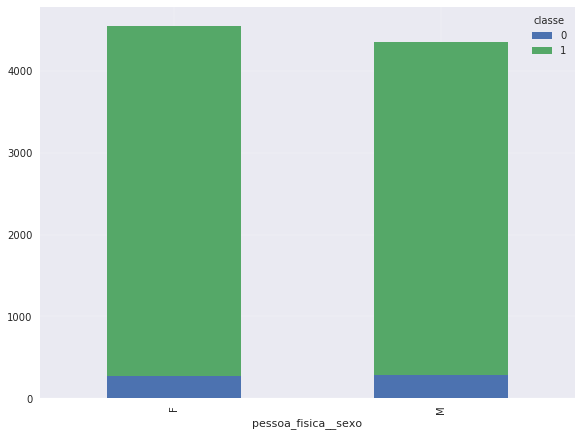

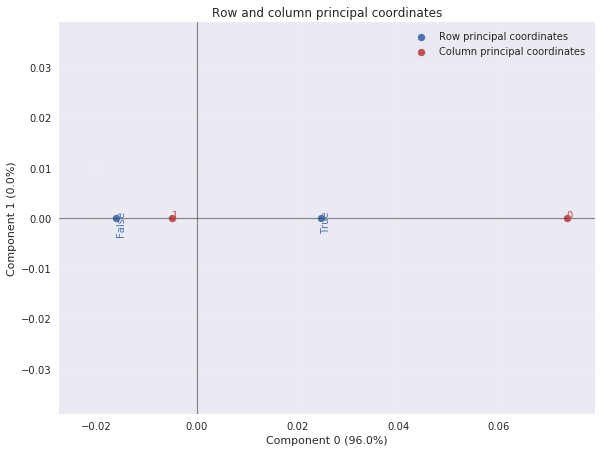

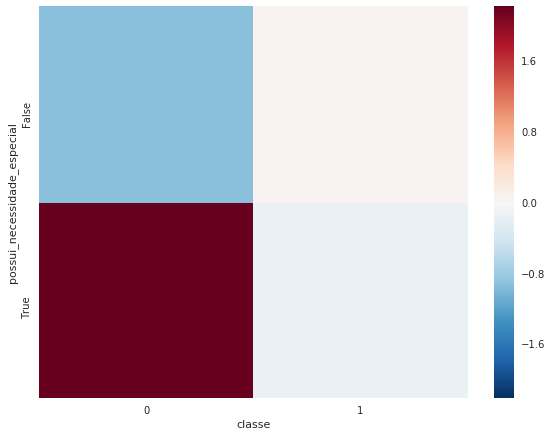

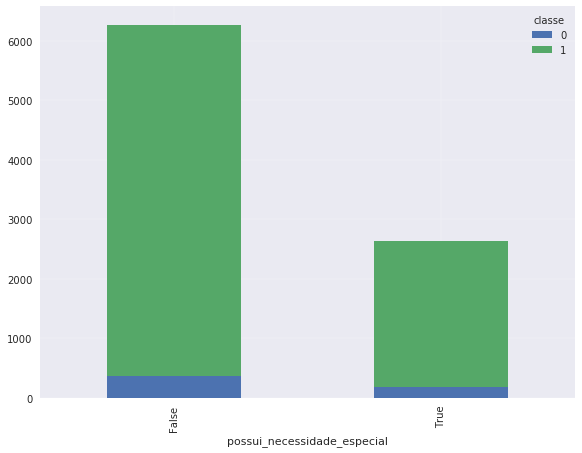

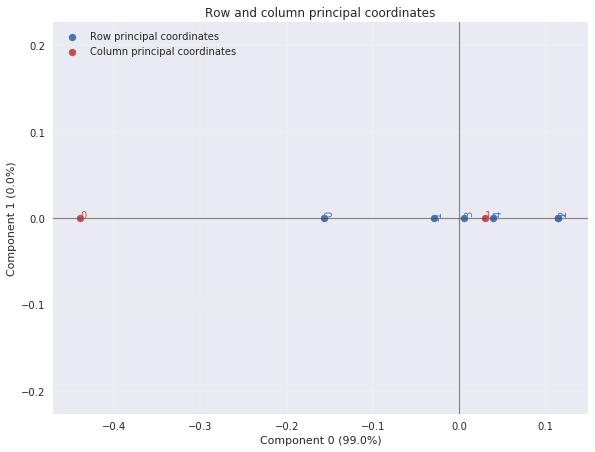

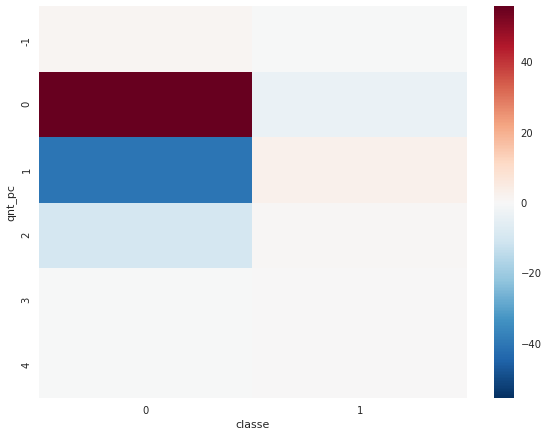

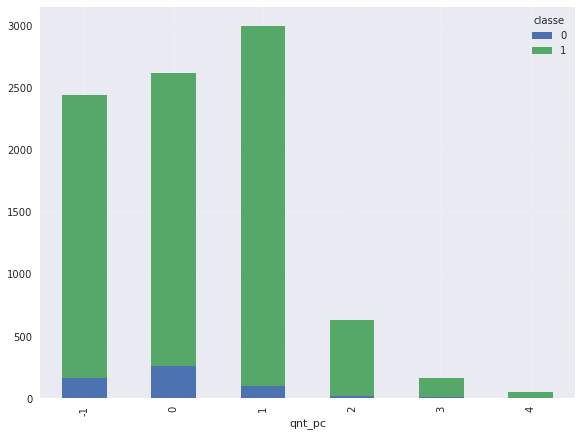

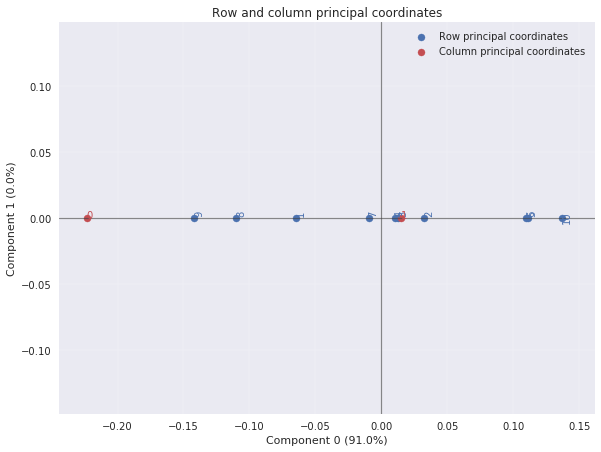

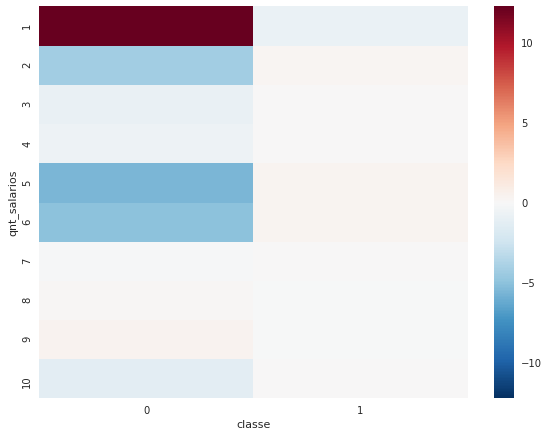

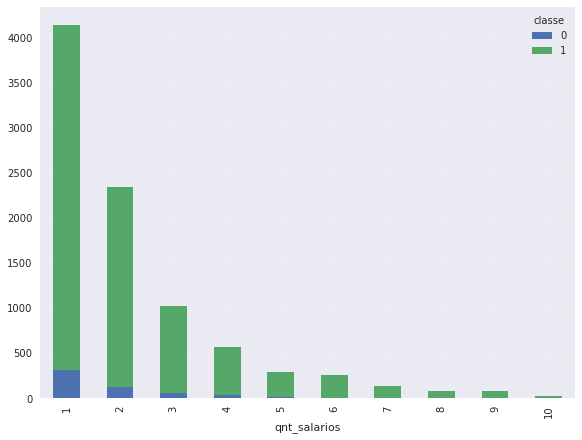

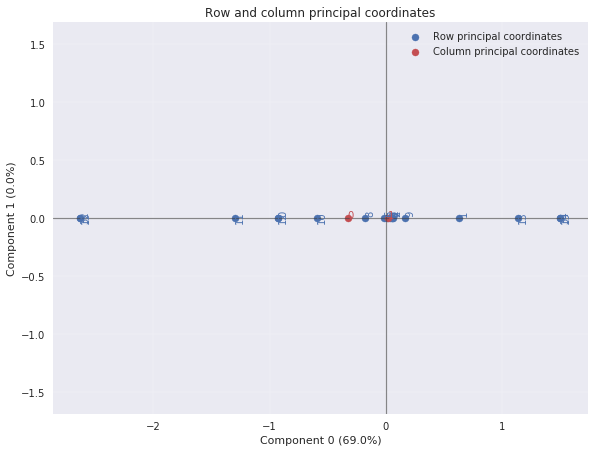

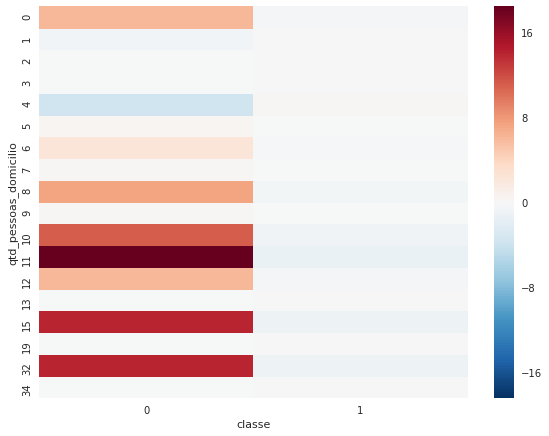

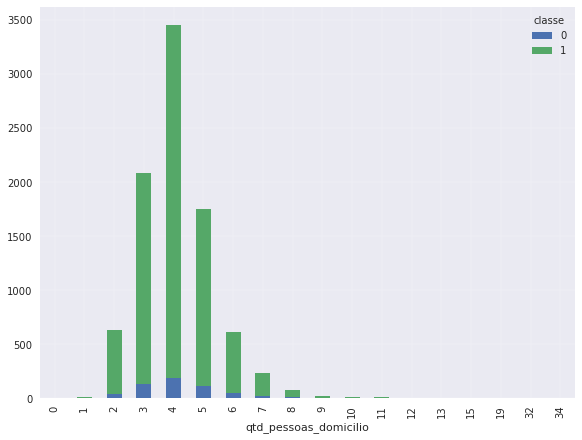

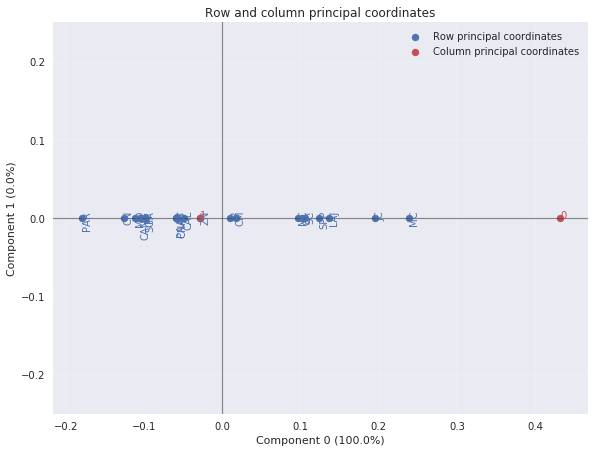

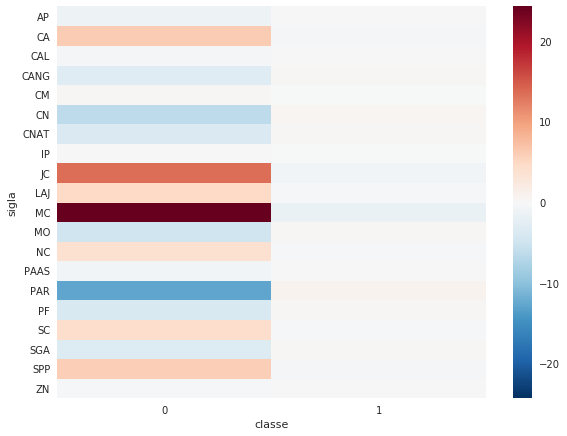

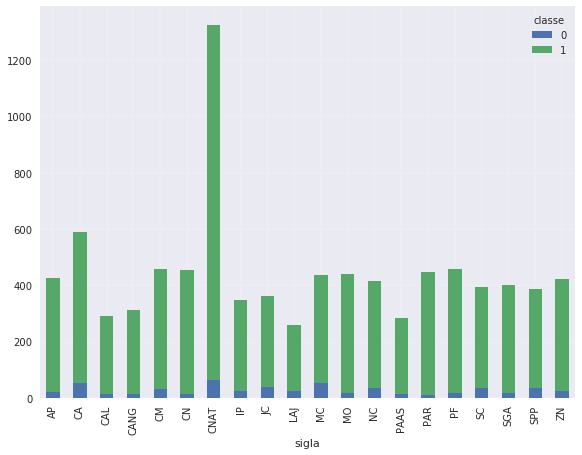

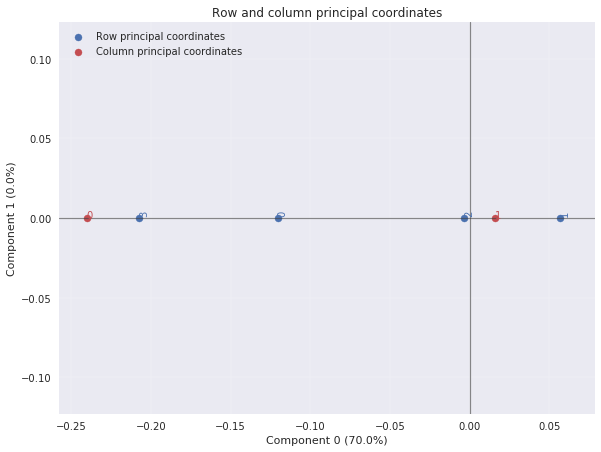

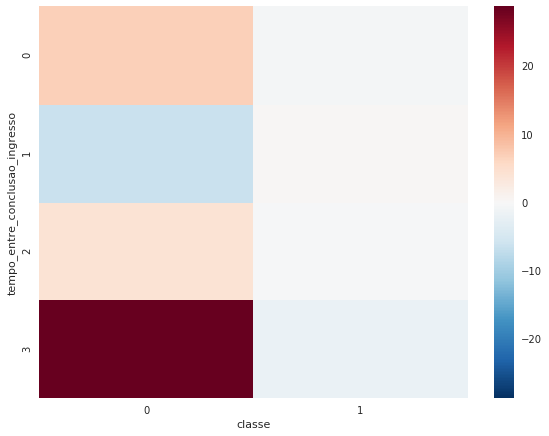

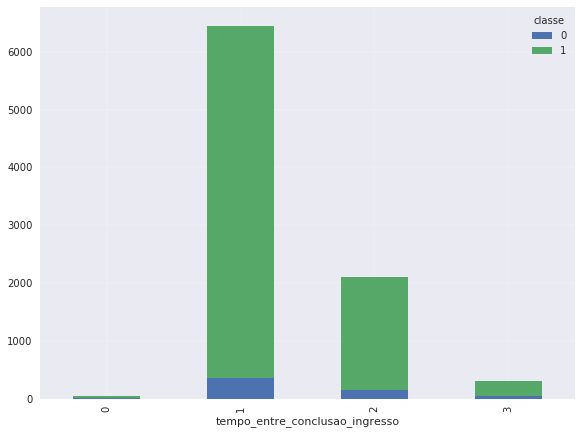

In [6]:
for index1 in dados.columns:
    
    #print(index1)
    if index1 in ['classe', 'id']:
        continue

    print(index1)
    print('-'*len(index1))        
        
    fig = plt.figure()

    #tabela de contigencia
    tbl = pd.crosstab(index = dados[index1], columns = dados.classe)

    #analise de correspondencia
    ca = prince.CA(tbl, n_components=-1)

    fig = plt.figure()
    fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)
    
    #FOI MODIFICADO A FUNÇÃO plot_rows_columns incluído em ax.anottate o parâmetro "rotation=90" 
    #na função row_column_principal_coordinate    
    
    #matriz residual
    res = calc_AC(tbl)
       
    fig = plt.figure()
    sns.heatmap(res)
    
    fig = plt.figure()
    tbl.plot(kind="bar", stacked=True)  